# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Will Sumerfield
- Miguel Monares
- Abdalla Atalla
- Ritik Raina
- Matilda Michel

# Abstract

The goal of our project is to learn about the strengths, weaknesses, and applications of several popular supervised
machine learning models. We will hypothesize their performance predicting Heart Disease on a large dataset of health
related metrics, train each model on the same data, and analyze their performance. Finally, we will attempt to create
an ensemble model which outperforms each of our individual models.

# Background
Heart disease is the leading cause of death in the United States, accounting for more than 696,000 deaths in 2020 alone.
 [1]. It is a disease that, if remedied proactively early, can be treated and/or alleviated. Hence, in order to best
 address the prominence of heart disease in the US, we must use leading technologies to help understand, predict, and
 detect indicators of heart disease in patients.

The technology of machine learning is already widely used in the field of medicine, including the domain of disease
prediction & classification.


### Prior Work:

1. Using patient information such as MRI scans, biomarkers, and numerical data about the patient, researchers have
been able to develop a random forest classifier that predicts Alzheimer's Disease in its early stages up to an 85%
accuracy [2]. The implications of this research are proactive care for those who are predicted to develop Alzheimer's
disease.
2. Using feature selection and data cleaning techniques, researchers have been able to leverage to use of different
machine learning models on multiple sources of data (meterological, epidemic, media data, etc.) to analyze, predict,
and prevent the spread of infectious diseases [3].
3. Finally, within the space of heart disease classification, researchers have already developed machine learning
and deep learning models to predict heart disease. Using a Heart Disease dataset from UCI, researchers have been able
to leverage deep learning techniques to achieve a 94% accuracy in predicting heart disease [4].

As demonstrated in the previous research that has been done in this field, many different models and data science
techniques have been employed in the objective of disease classification. It's important that we understand how we can
use the leading technology of machine learning to best predict and classify health conditions, like heart disease,
in order to promote healthy habits and preventative measure for those who are at risk. This facet of understanding
motivates the purpose of our project.

[1] [Leading Causes of Death](https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm)
[2] [AlzAlzheimer's Prediction using ML](https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full)
[3] [Using ML to Limit Disease Spread](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8219638/)
[4] [Predicting Heart Disease using ML](https://www.hindawi.com/journals/cin/2021/8387680/)

# Problem Statement

In this project, we are trying to find the strengths, weaknesses, and applications of the following supervised
machine learning models: Gaussian Process Classification, Support Vector Classification, Decision Trees,
K-Nearest Neighbors, MLP Classification, and Polynomial Classification.

Each of us has picked one of the aforementioned supervised machine learning models. With that model, each of us will
make a hypothesis about the model's performance on our dataset, train the model, and then analyze the model's
performance on the dataset.

To test our models, we are using a Dataset containing health-related features for over 300,000 subjects, and a column
specifying whether that subject has Heart Disease or not. Our models will be tasked with predicting Heart Disease given
the other features, the performance of which will be used to measure the accuracy of our hypotheses.

Before we work with the data, we will perform EDA to look for oddities and important information in our dataset.
Although we expect that all features in our dataset are somewhat relevant, there is a chance that some features
are not worth including the dataset. We will use a mixture of automated feature selection and common sense to choose
which (if any) features are excluded. Additionally, we may choose to perform feature extraction on the data, and create
more features.

In order to hypothesize the performance of a model, we will be taking into account the size of the dataset, the
difficulty of the prediction task (Predicting Heart Disease on a dataset of various health related metrics for
subjects), the number of and types of features, and the shape/distribution of the data.

Then, we will train our model on the data. Each of us will use the same preprocessed data before giving them to
our models, so that the models are easier to compare, although some models may use additional preprocessing on the data.

Next, we will measure the performance of the model using F1, Precision, and Accuracy scores on the training and testing'
datasets. Using that knowledge, we will attempt to figure out how and why our model's performance deviated from our
expectations.

Finally, we will attempt to merge our models into an ensemble, and see if we can best the performance of each of our
individual models using this method.

# Data

[Dataset Link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from matplotlib.patches import Patch
import re
warnings.filterwarnings('ignore')

### Data General Knowledge

As we can see below, our dataset is a collection of information related to heart health. The first column is a *True*
or *False* value which tells us whether that row's person has some form of heart disease. This is the variable we will
be trying to predict with our models, based on the information the other features provide.

We can see below that we have 17 different features with which to predict heart disease, and over 300,000 data points!

In [2]:
# Import the data as a dataframe
data = pd.read_csv("data/raw_data.csv")

# Display the number of columns in the dataframe
print(f"Number of Raw Features: {len(data.columns)}")
print()
print(f"Number of Datapoints: {data.shape[0]}")
print()

# Display the head of the dataframe
data.head()

Number of Raw Features: 18

Number of Datapoints: 319795



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Data Visualization

In order to see what our data looks like, and correlations between the features and heart disease, we can plot or
display each feature against Heart Disease.

### Heart Disease

It is good idea to start by looking at the proportion of heart disease among the subjects.
As we can see below, heart disease is relatively rare. This means that we will likely need to use data sampling methods
which equivocate the number of samples with and without Heart Disease.

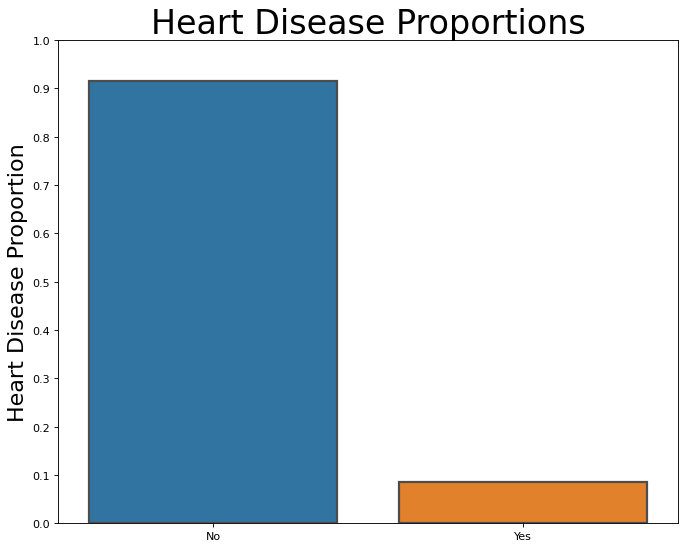

In [3]:
# Get a subset of the data for graphing
data = data.sample(100000)

# Get the heart disease data
heart_disease = data["HeartDisease"]

# Get an axis to plot to
fig, axis = plt.subplots(figsize=(10, 8), dpi=80)

# Plot the heart disease proportions
sns.barplot(x=heart_disease.unique(), y=heart_disease.value_counts()/heart_disease.value_counts().sum(),
           ax=axis, linewidth=2, edgecolor='0.3')

# Set the plot aesthetics
axis.set_title("Heart Disease Proportions", fontsize=30)
axis.set_yticks([round(0.1 * i, 1) for i in range(11)])
axis.set_yticklabels(axis.get_yticks(), size=10)
axis.set_xticklabels(labels=axis.get_xticklabels(), size=10)
axis.set_ylabel("Heart Disease Proportion", fontsize=20)

# Display the plot
plt.show()

### Continuously Valued Features

Some of the features in the dataset have continous values. In this case, it is helpful to plot them as a boxplot,
so that we can see the spread of the data. Below, we can see that Physical and Mental Health are strongly right skewed,
whereas BMI and Sleep Time are more normal in shape.

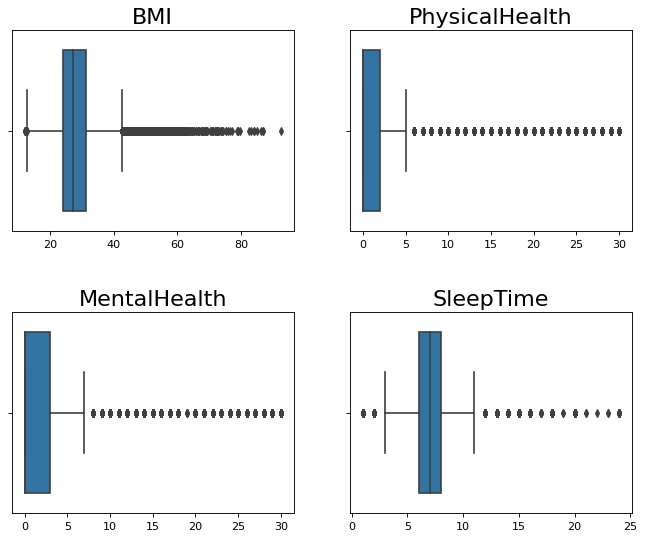

In [4]:
# Get all continuously valued features
continuous_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Get an axis to plot to
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=80)

# Add spacing between plots
fig.subplots_adjust(hspace=0.4)

# Create a boxplot for each feature
for axis, feature in zip(axes.flatten(), continuous_features):

    # Plot the feature
    sns.boxplot(x=feature, data=data, ax=axis)

    # Set the plot aesthetics
    axis.set_title(feature, fontsize=20)
    axis.set_xlabel('')


# Display all box plots
plt.show()

### Comparison to Heart Disease

Now that we understand the spread of each of the continuous features, we should try to see how they
correlate with Heart Disease.

Below, we can clearly see that, predictably, people's reported Physical Health appears to correlate strongly with
Heart Disease.

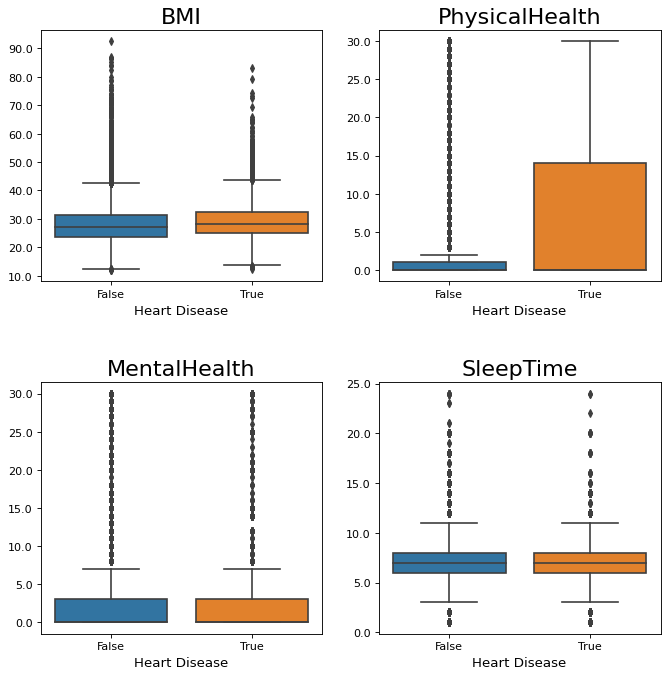

In [5]:
# Create a subplot for each feature in the dataset
fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=80)

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4)

# Graph each continuous feature
for index in range(len(continuous_features)):

    # Find the axis and feature
    axis = axes.flatten()[index]
    feature = continuous_features[index]

    # Plot the feature against heart disease
    sns.boxplot(x=heart_disease, y=feature, data=data, ax=axis)

    # Set the plot aesthetics
    axis.set_title(feature, fontsize=20)
    axis.set_yticklabels(axis.get_yticks(), size=10)
    axis.set_xticklabels(['False', 'True'], size=10)
    axis.set_xlabel("Heart Disease", fontsize=12)
    axis.set_ylabel("")

# Display all the plots
plt.show()

### Nominal Features

Now, we should analyze the trends of the nominal features. These values are mostly boolean, with some exceptions.
We can make use of stacked bar-plots to vizualize both the proportions within each feature, as well as the proportions of
heart disease for each value of that feature.

Below, we can see that many of our features do not have even distributions across their values.
This tells us that we will need to up/down sample our data in order to compensate. N

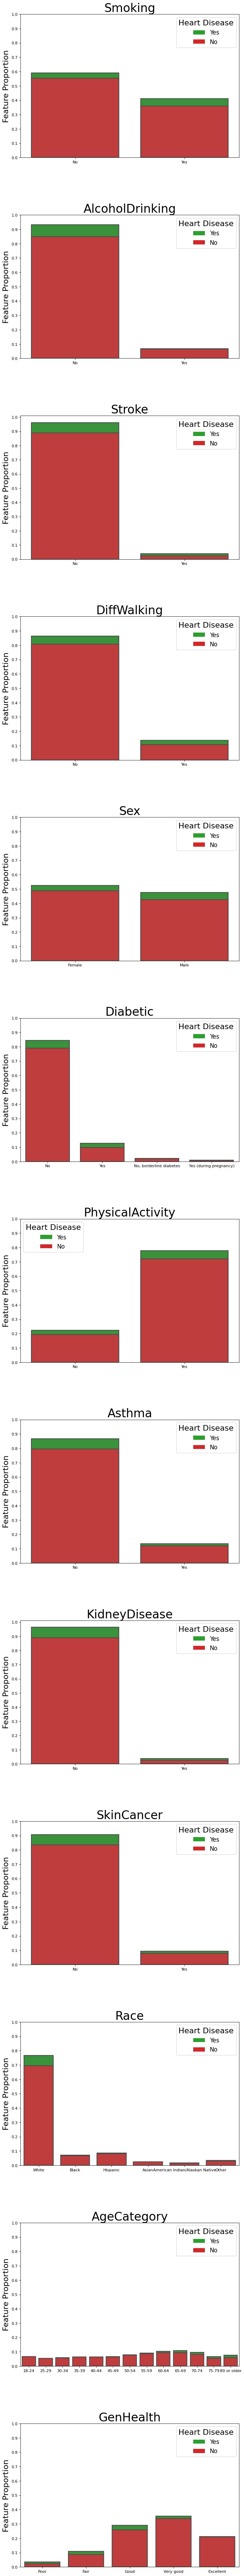

In [6]:
# Get all nominal features
nominal_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
                    'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'AgeCategory', 'GenHealth']

# Set the order of each nominal feature's values
nominal_feature_orders = [
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['Female', 'Male'],
    ['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['No', 'Yes'],
    ['White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaskan Native', 'Other'],
    sorted(data['AgeCategory'].unique(), key=lambda x: int(re.match('\d{2}?', x).group())),
    ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
]

# Create a subplot for each feature in the dataset
fig, axes = plt.subplots(len(nominal_features), figsize=(10, 120), dpi=80)

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4)

# Graph each nominal feature
for index in range(len(nominal_features)):

    # Find the axis and feature
    axis = axes[index]
    feature = nominal_features[index]

    # Find the feature dataframe
    feature_data = data[feature]

    # Find the number of heart disease cases with the feature
    heart_disease_false = [data[(feature_data == f_class) & (heart_disease == 'No')].shape[0] / feature_data.shape[0]
                           for f_class in nominal_feature_orders[index]]
    heart_disease_true = [data[(feature_data == f_class) & (heart_disease == 'Yes')].shape[0] / feature_data.shape[0]
                           for f_class in nominal_feature_orders[index]]
    for f_class in range(len(heart_disease_true)): heart_disease_true[f_class] += heart_disease_false[f_class]

    # Plot the feature against heart disease
    sns.barplot(x=nominal_feature_orders[index], y=heart_disease_true, ax=axis, color=sns.color_palette()[2],
                linewidth=2, edgecolor='0.3')
    sns.barplot(x=nominal_feature_orders[index], y=heart_disease_false, estimator=sum, ci=None, ax=axis,
                color=sns.color_palette()[3], linewidth=2, edgecolor='0.3')

    # Set the plot asesthetics
    axis.set_title(feature, fontsize=30)
    axis.set_yticks([round(0.1 * i, 1) for i in range(11)])
    axis.set_yticklabels(axis.get_yticks(), size=10)
    axis.set_xticklabels(labels=axis.get_xticklabels(), size=10)
    axis.set_ylabel("Feature Proportion", fontsize=20)
    axis.legend(handles=[Patch(facecolor=sns.color_palette()[2]), Patch(facecolor=sns.color_palette()[3])],
                title="Heart Disease", labels=['Yes', 'No'], title_fontsize=20, fontsize=15)

# Display all the plots
plt.show()

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain
and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or
theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will
be tested.

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in
a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote)
 against which your solution will be compared.

# Hypotheses:

### Gaussian Process Classification
*By Will Sumerfield*

Given that GPC models perform very well on datasets with a good spread over the dataspace, and that our dataset is very
large, I predict that the Gaussian Process Classifier model will perform very well, if I can find a good kernel
function for the data. However, I expect that this will be a very difficult process, given that there are many
columns of our data.

Additionally, I may need to use smaller subsamples of the data to train the GPC, given that GPCs take up **$$O(n^2)$$**
space, and take the same training time. I expect this model to be among, if not the best model we employ.

### Support Vector Classification
*By Miguel Monares*

Support Vector Machines (SVM) are effective in high dimensional spaces. Given that our data has decent number of features, we can expect these features to be a positive attribute for the SVM's performance on the dataset. The performance of the SVM works well when the data is mostly separable, but doesn't perform well when the dataset is overlapping. Hence, we can expect that heart disease classification performance of the SVM will depend heavily on whether the features can be effectively separated. It will be important that we use an appropriate kernel in order to get the best performance from this model.

### Decision Tree Classification
*By Miguel Monares*

Decision Tree's may be a useful model for our task of heart disease classification because Decision Tree's offer interpretability and visualization that may allow us to discover insights and connections between the features that are indicative of heart disease. However, in order to maximize our performance, we need to make sure that decision tree doesn't overfit to the data, which we can influence by controlling pruning and max-depth. I expect this model will be able to find underlying connection between the features in our data, but will not be among the best.

### Random Forest Classification
*By Abdalla Atalla*
As the number of trees gets bigger, increases it will lead to no overfitting of the model which will be a benefit. Also, we will try to aim for low bias + correlation that will lead to a better accuracy. I expect that the RF will do great because of the accuracy, simplicity, and how computationally inexpensive it is to work with many features. Another positive to using RF is that it is good with big amounts of data and it also isn't too sensitive to the outliers in the data.

### Neural Networks
*By Ritik Raina*

Techinally, we are working with a binary classification modulation - either one has or does not have a heart disease. Here, neural networks will be helpful when it comes to ensuring taht we apply weights and biases to each of the fitted features, whenever the training is in process. Using neural network architectures will open up the opportunity to work with activation functions which are extremely influential of the features and their values.

# Evaluation Metrics

We will use 3 different metrics to assess the performance of our models on our task of Heart Disease
Prediction/Classification.

The first metric we will use is **Recall/Sensitivity** (formula shown below). We will use this metric to assess
performance of our task because recall measures the model's ability to classify the true positives in its predictions.
This is relevant to the problem we are solving because we want our model to miss as few truly heart disease-prone
individuals as possible. It is very expensive to miss a true positive (miss a heart disease prone patient) in this
context.

The second metric we will consider is **Precision** (formula shown below). We will use this metric to measure the
performance of our model because it tells us how many predicted positives are actually positive. In the context of
our problem, this metric answers the question: How many patients predicted to have heart disease actually had heart
disease? Recall is a measure that can benefit from biasing predictions toward all true, so we use Precision to ensure
that our model is still making balanced and accurate predictions.

![Precision and Recall](assets/PrecisionRecall_formula.png)

The last metric we will consider is **the F1 score** as it is the harmonic balance between Precision and Recall. We use F1 to make
sure that our models predictions are measuring Prediction and Recall in a balanced manner, so that we assess if our
model is biased towards predicting heart disease or non heart disease.

![F1](assets/F1_formula.png)

In the evaluation of our models, we will primarily be looking at Recall/Sensitivity, as it is the most relevant metric
to the problem we are trying to address, which is the prediction/classification of heart disease. However, we will
take the other two metrics into account as they provide information into the general accuracy of our model.



# Preliminary results

For our model testing, we created an 'ML Playground', which contains 5 different datasets. Each dataset has a noisy and
a raw version, as well as training and testing splits. We trained each of our models on these datasets, and tested their
performance. Notably, this playground uses regression instead of classification versions of our models, but the proof
of concept works well. Our results have informed our hypotheses, and helped us understand the strengths and weaknesses
of our models.

### Gaussian Process Classification
*By Will Sumerfield*

As the graphs below demonstrate, the GPC algorithm seems to perform very well in locations where the data is dense,
and poorly  where the data is sparse - in other words, it isn't learning patterns so much as it is learning the trends
of data in each area of the plot. However, given sufficient datapoints, it learns the shape of the data very well.
It is worth noting, however, that the model performed very poorly when I did not use the WhiteNoise kernel. This
implies that my kernel selection will likely make or break my model's performance.

![](assets/GPC_testing.png)

### Support Vector Regression
*By Miguel Monares*

Without looking too deeply into model parameter optimization, the results of the SVM model do not seem exceed the performance of other models, like the Gassian Process model. SVM is able to model the quadratic, sine, and polynomial curve relatively well, but does not perform well on the wave and mixture functions. We predict this is due to the overlapping patterns of the data present in both curves.

![](assets/SVR_testing.png)

### Decision Tree Regression
*By Miguel Monares*

The Decision Tree Regression Model performs decently on all of the functions. It operatres by predicting the mean for each of its splits in the function, which doesn't perform well given the continuous nature of each function. As a result, the regression performance isn't as strong as other models, but we may find better, interpretable performance when using the model in our heart-disease classification problem.

![](assets/DTR_testing.png)

### Random Forest regression
*By Abdalla Atalla*

Looking at the graphs for the Random Forest Regression Model we can see that it performs pretty well on most of the functions. Compared to the other models looked at I think that the Random Forest was able to do better than some because of the multiclass feature where it can take a mix of numerical and categorical features. For the sparse data SVM would be better suited as we know based on the properties of SVM and Random Forest.

![](assets/RFR_testing.png)

### Neural Networks
*By Ritik Raina*

The following graph shows how the model loss functions as it trains for longer data. The loss seems to go below, and now it's a check of the confusion matrices and feature importance values that needs to be done. Compared to other models, there is little outlier affiliation, however, overfitting could occur with robust datasets.

![](assets/NN_testing.png)

# Ethics & Privacy

When developing machine learning applications, its important to be aware and proactive against ethics and privacy concerns. The dataset we use does not include Personal Identifiable Information (PII), which helps ensure that the privacy of patients and kept.

Ethical concerns can arise in the results processing and analysis stage. Its important that the results are validated to make sure they are reasonable, so that possible correlations in the underlying data are pursued and percieved to be truth. For example, if a correlation between race and diabeties is found, its important to not jump to conclusions and declare causality/truth behind the correlation.

Additionally, we need to make sure that the data we use to train our model is representative of the general population, so that we can best fit our model to classify heart disease in patients with different types of backgrounds .

In the field of medicine, its important that our product is tested and verified in the interest of liability. While it is important that we miss as few positively predicted heart disease patients in our model, we need to make sure that our model doesn't overly classify non heart disease prone patients as positive as this would lead to resources and facilities being directed toward those who don't need it.

In the field, it is possible that this product may produce some unintended consequences relating to ethics or privacy. If this product is release into the field, we will make sure to address any unintended outcomes breaching ethical or privacy concerns by working to understand why such breaches occurred and being proactive about alleviating such conerns.

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Each of us expect to learn about the dataset and the features it entails.*
* *Each of us should pick a particular ML model to evaluate our dataset on and write our own code.*
* *In the case that any of our teammates reach issues concerning ML results; we can do additional meetings to help out.*

# Project Timeline Proposal

| Meeting Date  | Meeting Time | Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/1  |  4 PM | Peer reviews + model research, data visualization + cleaning | Discuss peer reviews + any ideas we’ve gotten from them, discuss + compare ML models we researched to start deciding what we want to use |
| 5/8  |  4 PM |  Peer reviews + indv. code work on feature selection + exploring our models | Further discuss models we want to use, decide what features we want to use to make prediction|
| 5/15  | 4 PM  | more exploring our models + feature selection | Finish data cleaning + most of EDA, discussed having issues w/ usable features --> decided to switch to another dataset + classfication task|
| 5/22  | 4 PM  | code work on indv. models + finish/turn-in checkpoint + EDA| have EDA + visualization finished, check-in with indv. model exploring + do any coding we want to do together, discuss current state of our tasks, see if theres anything to help each other with/do together |
| 5/29  | 4 PM  | have most indv. project/model coding done | Go over + clean up coding aspect of project + compare performance of models, start report/assign sections to do (focus on intro/hypoth/methods/background) |
| 6/5  | 4 PM  | Indv. report work + maybe any final touches to coding | Another coding + report draft check in/discussion, assign any finishing touches on either |
| 6/8  | 4 PM  | Finishing touches | Final check-in + reviewing project --> TURN IN FINAL PROJECT |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
